In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

diabetesdf = pd.read_csv('combined_dataset.csv', na_filter = False)

#since we only need the 3rd column(Code), we will remove the Date and Time columns
diabetesdf.drop(diabetesdf.columns[[0,1]], axis = 1, inplace=True)
diabetesdf.to_csv('diabetesdf.csv', index=False)
diabetesdf

,Code,Value
0,58,100
1,33,9
2,34,13
3,62,119
4,33,7
...,...,...
29325,33,1
29326,34,7
29327,34,7
29328,34,7


In [2]:
x = diabetesdf['Code']
y = diabetesdf['Value']
print(x)
print(y)

0        58
1        33
2        34
3        62
4        33
         ..
29325    33
29326    34
29327    34
29328    34
29329    34
Name: Code, Length: 29330, dtype: int64
0        100
1          9
2         13
3        119
4          7
        ... 
29325      1
29326      7
29327      7
29328      7
29329      7
Name: Value, Length: 29330, dtype: object


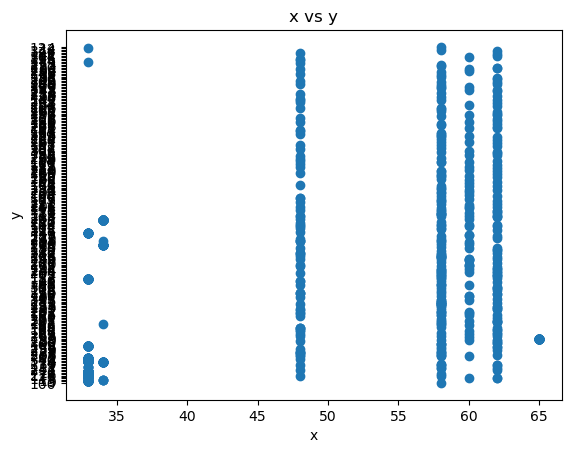

In [3]:
#this is a scatterplot to show the relationship between x and y
plt.scatter(x.head(1000),y.head(1000))
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#this turns the original dataframe into a one-hot encoded one. Value remains same for each row.
#However, code only returns 1 if true for the Code column
diabetes_one_hot_data = pd.get_dummies(diabetesdf, columns = ['Code'])
diabetes_one_hot_data.to_csv('diabetes_one_hot_dataknn.csv', index=False)
diabetes_one_hot_data

,Value,Code_0,Code_4,Code_33,Code_34,Code_35,Code_36,Code_48,Code_56,Code_57,...,Code_63,Code_64,Code_65,Code_66,Code_67,Code_68,Code_69,Code_70,Code_71,Code_72
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29325,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29326,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29327,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29328,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Here I got rid of the Code_ in the column names as it was causing me issues for some reason
diabetes_one_hot_data.columns = [int(col.split('_')[1]) if isinstance(col, str) and col.startswith('Code_') else col for col in diabetes_one_hot_data.columns]
diabetes_one_hot_data

,Value,0,4,33,34,35,36,48,56,57,...,63,64,65,66,67,68,69,70,71,72
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29325,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29326,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29327,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29328,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

#this splits the training-validation-test sets into a 60-10-30% split
train_data, temp_data = train_test_split(diabetes_one_hot_data, test_size=0.4, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.75, random_state=42)

#this splits the features
X_train = train_data.drop('Value', axis=1)
X_valid = valid_data.drop('Value', axis=1)
X_test = test_data.drop('Value', axis=1)

#this splits the Value variable since it is the target
y_train = train_data['Value']
y_valid = valid_data['Value']
y_test = test_data['Value']

#prints out shape of sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (17598, 24) (17598,)
Validation set shape: (2933, 24) (2933,)
Test set shape: (8799, 24) (8799,)


In [7]:
#dataframe for training set
train_data

,Value,0,4,33,34,35,36,48,56,57,...,63,64,65,66,67,68,69,70,71,72
21140,220,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25070,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25928,164,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29166,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26709,18,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,202,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15795,119,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
valid_data

,Value,0,4,33,34,35,36,48,56,57,...,63,64,65,66,67,68,69,70,71,72
19904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21806,87,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25627,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3073,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27119,269,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18682,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25006,259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3901,78,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
test_data

,Value,0,4,33,34,35,36,48,56,57,...,63,64,65,66,67,68,69,70,71,72
19504,133,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2968,155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20851,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11032,136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22774,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,11,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7628,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2912,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17190,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from tqdm import tqdm
#tqdm to keep a progress bar on the code running

#this sigmoid functions puts the values between 0 and 1
def sigmoid_formula(instance):
    sigmoid_denominator = 1 + np.exp(-instance)
    return 1 / sigmoid_denominator

#logistic regression function that uses gradient descent
def log_regress(instance, output, iterations, learning_rate=0.0001):
    #initialize weights with zeros
    m = np.zeros(X_train.shape[1])
    b = 0

    gradients_m = []  #list to store gradient values after each iteration
    gradients_b = []
    
    progress_bar = tqdm(total=iterations, desc="Training Progress")

    for _ in range(iterations):
        #after each iteration, the predictions are made using the sigmoid formula function
        predictions = sigmoid_formula(np.dot(instance, m) + b)
        error = predictions - output
        
        #here the gradients are calcuated for the weights and bias
        dm = (1/len(instance)) * np.dot(instance.T, error)
        db = (1/len(instance)) * np.sum(error)

        #the weights and bias are updates by using gradient descent
        m -= learning_rate * dm
        b -= learning_rate * db

        gradients_m.append(dm)
        gradients_b.append(db)

        progress_bar.update(1) 
        progress_bar.set_postfix({'m': f'{m}', 'b': f'{b}'})

    progress_bar.close()
    return m, b, gradients_m, gradients_b


#this function predicts new values using the weights and bias from the logistic regression function
def predictor_function(instance, m, b):
    return (m * instance) + b

numeric_mask = pd.to_numeric(y_train, errors='coerce').notna()
X_train = X_train[numeric_mask]
y_train = y_train[numeric_mask]

y_train = y_train.astype(float)


m, b, gm, gb = log_regress(X_train, y_train, 1000)
print('m is:', m)
print('b is:', b)

Training Progress:   0%|          | 1/1000 [00:00<00:14, 68.24it/s, m=[ 0.00000000e+00  0.00000000e+00  2.04399795e-04  1.94066253e-04
  5.43428767e-05  0.00000000e+00  1.08103478e-03  6.08088110e-05
  5.49154761e-04  1.99190051e-03  9.65052080e-06  1.36300302e-03
  5.20206045e-05  1.69694633e-03  1.38769993e-04  4.57982811e-04
 -5.74876202e-07 -2.47595196e-07 -5.89105811e-07 -5.69184359e-08
Training Progress:   0%|          | 2/1000 [00:00<00:10, 99.59it/s, m=[ 0.00000000e+00  0.00000000e+00  4.08733765e-04  3.88106311e-04
  1.08678834e-04  0.00000000e+00  2.16205550e-03  1.21616800e-04
  1.09830223e-03  3.98377193e-03  1.93009409e-05  2.72598395e-03
  1.04040770e-04  3.39386674e-03  2.77538473e-04  9.15959307e-04
 -1.15200917e-06 -4.96162408e-07 -1.18052425e-06 -1.14060329e-07
Training Progress:   0%|          | 3/1000 [00:00<00:14, 66.88it/s, m=[ 0.00000000e+00  0.00000000e+00  6.13001914e-04  5.82120174e-04
  1.63007874e-04  0.00000000e+00  3.24306216e-03  1.82423967e-04
  1.647442

m is: [ 0.00000000e+00  0.00000000e+00  1.90887815e-01  1.88683009e-01
  5.29011614e-02  0.00000000e+00  1.07837839e+00  6.06376476e-02
  5.47706776e-01  1.98682923e+00  9.62944770e-03  1.35893558e+00
  5.19291826e-02  1.69231159e+00  1.38457499e-01  4.56717989e-01
 -1.04771488e-03 -4.51246167e-04 -1.07364814e-03 -1.03735103e-04
 -2.17843474e-04 -4.14939151e-04 -2.90457759e-04 -3.06017950e-04]
b is: 7.810099712778256


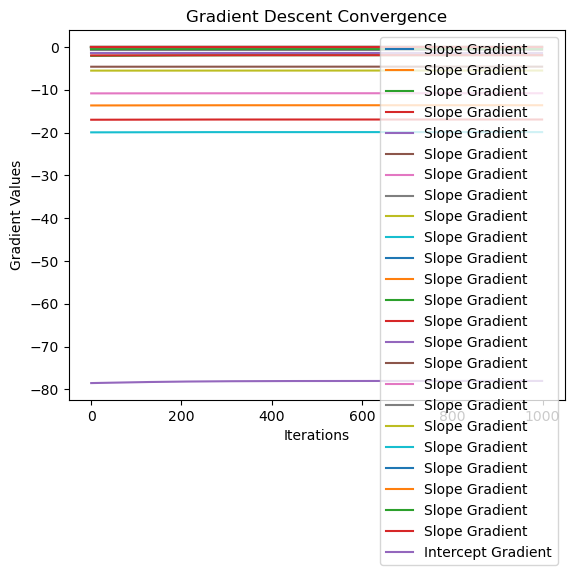

In [173]:
plt.plot(range(1000), gm, label='Slope Gradient') 
plt.plot(range(1000), gb, label='Intercept Gradient')
plt.xlabel("Iterations")
plt.ylabel("Gradient Values") 
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [11]:
#making predictions for validation set
newvalidation_predictions = predictor_function(X_valid, m, b)
newvalidation_predictions

,0,4,33,34,35,36,48,56,57,58,...,63,64,65,66,67,68,69,70,71,72
19904,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.810100,7.8101,7.810100,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.809026,7.8101,7.8101,7.8101,7.8101,7.8101
21806,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,8.888478,7.8101,7.810100,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
25627,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.810100,7.8101,7.810100,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
3073,7.8101,7.8101,7.810100,7.998783,7.8101,7.8101,7.810100,7.8101,7.810100,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
27119,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.810100,7.8101,8.357806,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.810100,7.8101,7.810100,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
18682,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.810100,7.8101,7.810100,7.810100,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
25006,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.810100,7.8101,7.810100,9.796929,...,7.8101,7.810100,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101
3901,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.810100,7.8101,7.810100,7.810100,...,7.8101,8.266818,7.8101,7.8101,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101


In [12]:
#this removes all the values for the columns where there wasn't a one hot encoded 1
threshold = 1e-6 

newvalidation_predictions = newvalidation_predictions.applymap(lambda x: np.nan if abs(x - 7.8101) < threshold else x)
newvalidation_predictions

,0,4,33,34,35,36,48,56,57,58,...,63,64,65,66,67,68,69,70,71,72
19904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.809026,NaN,NaN,NaN,NaN,NaN
21806,NaN,NaN,NaN,NaN,NaN,NaN,8.888478,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3073,NaN,NaN,NaN,7.998783,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.357806,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18682,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.796929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.266818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#this will get rid of unnecessary columns
stacked_df = newvalidation_predictions.stack()

#creates a new DataFrame with one column and drop NaN values
validfinal_df = pd.DataFrame({'Combined_Column': stacked_df.dropna().values})
validfinal_df

,Combined_Column
0,7.809026
1,8.888478
2,9.169035
3,7.998783
4,8.357806
...,...
2925,8.000988
2926,8.000988
2927,9.796929
2928,8.266818


In [14]:
#just turned the df into an array
validfinal_array = validfinal_df.values
validfinal_array

array([[7.80902606],
       [8.8884781 ],
       [9.16903529],
       ...,
       [9.79692894],
       [8.2668177 ],
       [7.99878272]])

In [15]:
y_testarray = y_test.values
y_testarray

array(['133', '155', '2', ..., '3', '15', '6'], dtype=object)

In [16]:
#applying sigmoid function to find probabilities of validation predictions
probabilities = 1 / (1 + np.exp(-validfinal_array))

print(probabilities)

[[0.99959411]
 [0.99986205]
 [0.99989579]
 ...
 [0.99994438]
 [0.99974316]
 [0.99966424]]


In [17]:
#filter out non-numeric values
y_testarray_numeric = [float(value) for value in y_testarray if value.replace('.', '', 1).isdigit()]

#convert to NumPy array
y_testarray_numeric = np.array(y_testarray_numeric)

#calculate probabilities using the sigmoid function
y_probabilities = 1 / (1 + np.exp(-y_testarray_numeric))

print(y_probabilities)

[1.         1.         0.88079708 ... 0.95257413 0.99999969 0.99752738]


In [18]:
print("Actual vs Predicted vs prob:")
for actual, predicted in zip(y_testarray, validfinal_array):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted vs prob:
Actual: 133, Predicted: [7.80902606]
Actual: 155, Predicted: [8.8884781]
Actual: 2, Predicted: [9.16903529]
Actual: 136, Predicted: [7.99878272]
Actual: 13, Predicted: [8.35780649]
Actual: 5, Predicted: [9.50241131]
Actual: 108, Predicted: [8.00098753]
Actual: 10, Predicted: [9.50241131]
Actual: 3, Predicted: [8.00098753]
Actual: 36, Predicted: [7.99878272]
Actual: 138, Predicted: [8.8884781]
Actual: 233, Predicted: [7.86300087]
Actual: 5, Predicted: [8.00098753]
Actual: 4, Predicted: [8.8884781]
Actual: 2, Predicted: [9.50241131]
Actual: 7, Predicted: [9.50241131]
Actual: 115, Predicted: [7.80902606]
Actual: 7, Predicted: [9.79692894]
Actual: 7, Predicted: [8.00098753]
Actual: 194, Predicted: [8.8884781]
Actual: 229, Predicted: [9.50241131]
Actual: 144, Predicted: [8.00098753]
Actual: 100, Predicted: [8.00098753]
Actual: 75, Predicted: [8.00098753]
Actual: 4, Predicted: [9.79692894]
Actual: 4, Predicted: [9.16903529]
Actual: 119, Predicted: [8.00098753]
Ac

In [19]:
print("Actual Probabilties vs Predicted Probabilities:")
for actualprob, predictedprob in zip(y_probabilities, probabilities):
    print(f"Actual: {actualprob}, Predicted: {predictedprob}")

Actual Probabilties vs Predicted Probabilities:
Actual: 1.0, Predicted: [0.99959411]
Actual: 1.0, Predicted: [0.99986205]
Actual: 0.8807970779778823, Predicted: [0.99989579]
Actual: 1.0, Predicted: [0.99966424]
Actual: 0.999997739675702, Predicted: [0.9997655]
Actual: 0.9933071490757153, Predicted: [0.99992533]
Actual: 1.0, Predicted: [0.99966498]
Actual: 0.9999546021312976, Predicted: [0.99992533]
Actual: 0.9525741268224334, Predicted: [0.99966498]
Actual: 0.9999999999999998, Predicted: [0.99966424]
Actual: 1.0, Predicted: [0.99986205]
Actual: 1.0, Predicted: [0.99961543]
Actual: 0.9933071490757153, Predicted: [0.99966498]
Actual: 0.9820137900379085, Predicted: [0.99986205]
Actual: 0.8807970779778823, Predicted: [0.99992533]
Actual: 0.9990889488055994, Predicted: [0.99992533]
Actual: 1.0, Predicted: [0.99959411]
Actual: 0.9990889488055994, Predicted: [0.99994438]
Actual: 0.9990889488055994, Predicted: [0.99966498]
Actual: 1.0, Predicted: [0.99986205]
Actual: 1.0, Predicted: [0.9999253

In [20]:
#this will give the new test set predictions with gradient descent function
newtest_predictions = predictor_function(X_test, m, b)

newtest_predictions

,0,4,33,34,35,36,48,56,57,58,...,63,64,65,66,67,68,69,70,71,72
19504,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
2968,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
20851,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
11032,7.8101,7.8101,7.810100,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,9.796929,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
22774,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
7628,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
2912,7.8101,7.8101,8.000988,7.810100,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101
17190,7.8101,7.8101,7.810100,7.998783,7.8101,7.8101,7.8101,7.8101,7.8101,7.810100,...,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101,7.8101


In [21]:
#this removes all the values for the columns where there wasn't a one hot encoded 1
threshold = 1e-6 

newtest_predictions = newtest_predictions.applymap(lambda x: np.nan if abs(x - 7.8101) < threshold else x)
newtest_predictions

,0,4,33,34,35,36,48,56,57,58,...,63,64,65,66,67,68,69,70,71,72
19504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20851,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.796929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22774,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7628,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2912,NaN,NaN,8.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17190,NaN,NaN,NaN,7.998783,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
stacked_df = newtest_predictions.stack()

#creates a new DataFrame with one column and drop NaN values
testfinal_df = pd.DataFrame({'Combined_Column': stacked_df.dropna().values})
testfinal_df

,Combined_Column
0,9.502411
1,9.169035
2,8.000988
3,9.796929
4,8.000988
...,...
8782,8.000988
8783,8.000988
8784,8.000988
8785,7.998783


In [23]:
testfinal_array = testfinal_df.values
testfinal_array

array([[9.50241131],
       [9.16903529],
       [8.00098753],
       ...,
       [8.00098753],
       [7.99878272],
       [8.00098753]])

In [24]:
#applying sigmoid function to find probabilities of test predictions
testprobabilities = 1 / (1 + np.exp(-testfinal_array))

print(testprobabilities)

[[0.99992533]
 [0.99989579]
 [0.99966498]
 ...
 [0.99966498]
 [0.99966424]
 [0.99966498]]


In [25]:
threshold = 0.5

#apply threshold to classify as positive or negative
predicted_classes = (testprobabilities > threshold).astype(int)
actual_classes = (y_probabilities > threshold).astype(int)

In [26]:
print("Actual vs Predicted Values:")
for actual, predicted in zip(y_testarray, testfinal_array):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual vs Predicted Values:
Actual: 133, Predicted: [9.50241131]
Actual: 155, Predicted: [9.16903529]
Actual: 2, Predicted: [8.00098753]
Actual: 136, Predicted: [9.79692894]
Actual: 13, Predicted: [8.00098753]
Actual: 5, Predicted: [8.00098753]
Actual: 108, Predicted: [9.79692894]
Actual: 10, Predicted: [8.00098753]
Actual: 3, Predicted: [8.00098753]
Actual: 36, Predicted: [8.35780649]
Actual: 138, Predicted: [9.79692894]
Actual: 233, Predicted: [9.50241131]
Actual: 5, Predicted: [7.99878272]
Actual: 4, Predicted: [8.00098753]
Actual: 2, Predicted: [7.99878272]
Actual: 7, Predicted: [7.99878272]
Actual: 115, Predicted: [8.8884781]
Actual: 7, Predicted: [8.00098753]
Actual: 7, Predicted: [7.99878272]
Actual: 194, Predicted: [9.16903529]
Actual: 229, Predicted: [9.50241131]
Actual: 144, Predicted: [9.16903529]
Actual: 100, Predicted: [9.79692894]
Actual: 75, Predicted: [8.2668177]
Actual: 4, Predicted: [8.00098753]
Actual: 4, Predicted: [7.99878272]
Actual: 119, Predicted: [9.50241131]
A

In [27]:
print("Actual Probabilties vs Predicted Probabilities:")
for actualprob, predictedprob in zip(y_probabilities, testprobabilities):
    print(f"Actual: {actualprob}, Predicted: {predictedprob}")

Actual Probabilties vs Predicted Probabilities:
Actual: 1.0, Predicted: [0.99992533]
Actual: 1.0, Predicted: [0.99989579]
Actual: 0.8807970779778823, Predicted: [0.99966498]
Actual: 1.0, Predicted: [0.99994438]
Actual: 0.999997739675702, Predicted: [0.99966498]
Actual: 0.9933071490757153, Predicted: [0.99966498]
Actual: 1.0, Predicted: [0.99994438]
Actual: 0.9999546021312976, Predicted: [0.99966498]
Actual: 0.9525741268224334, Predicted: [0.99966498]
Actual: 0.9999999999999998, Predicted: [0.9997655]
Actual: 1.0, Predicted: [0.99994438]
Actual: 1.0, Predicted: [0.99992533]
Actual: 0.9933071490757153, Predicted: [0.99966424]
Actual: 0.9820137900379085, Predicted: [0.99966498]
Actual: 0.8807970779778823, Predicted: [0.99966424]
Actual: 0.9990889488055994, Predicted: [0.99966424]
Actual: 1.0, Predicted: [0.99986205]
Actual: 0.9990889488055994, Predicted: [0.99966498]
Actual: 0.9990889488055994, Predicted: [0.99966424]
Actual: 1.0, Predicted: [0.99989579]
Actual: 1.0, Predicted: [0.9999253

In [28]:
print("Actual vs Predicted:")
for actual_class, pred_class in zip(actual_classes, predicted_classes):
    print(f"Actual:Actual Class: {actual_class}  , Predicted Class: {pred_class}")

Actual vs Predicted:
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Class: [1]
Actual:Actual Class: 1  , Predicted Cla

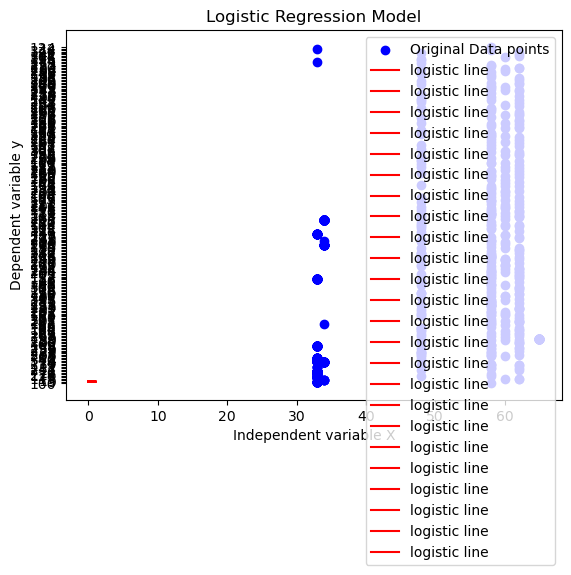

In [192]:
#plots original data points against regression line of the iterated test set predictions
plt.scatter(x.head(1000), y.head(1000), color='blue', label='Original Data points')
plt.plot(X_test.head(8787), testprobabilities, color='red', label='logistic line')
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')
plt.title('Logistic Regression Model')
plt.legend()
plt.show()

In [29]:
#accuracy calculations for test predictions
correct = 0
for i in range(min(len(y_testarray), 8787)):
    if y_testarray[i] == testfinal_array[i]:
        correct += 1

accuracy = correct / len(y_testarray)
print(correct)
print("Accuracy:", accuracy)


0
Accuracy: 0.0


C:\Users\shrey\AppData\Local\Temp\ipykernel_27600\736378651.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_testarray[i] == testfinal_array[i]:


In [30]:
#precision calculations 
true_positives = 0
predicted_positives = 0  
for i in range(min(len(y_testarray), 8787)):
    if testfinal_array[i] == y_testarray[i]: 
        true_positives += 1
    predicted_positives += 1
    
precision = true_positives / predicted_positives
print(true_positives)
print(predicted_positives)
print("Precision:", precision)  

0
8787
Precision: 0.0


C:\Users\shrey\AppData\Local\Temp\ipykernel_27600\560450145.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if testfinal_array[i] == y_testarray[i]:


In [31]:
#recall calculations
true_positives = 0  
actual_positives = 0
for i in range(min(len(y_testarray), 8787)):
    if testfinal_array[i] == y_testarray[i]:
        true_positives += 1 
    actual_positives += 1
print(true_positives)
print(actual_positives)
recall = true_positives / actual_positives  
print("Recall:", recall)

0
8787
Recall: 0.0


C:\Users\shrey\AppData\Local\Temp\ipykernel_27600\3682212157.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if testfinal_array[i] == y_testarray[i]:


In [32]:
#f1 score calculations
f1 = 2 * ( (precision * recall) / (precision + recall)) 
print("F1 Score:", f1)

ZeroDivisionError: float division by zero

In [39]:
# Convert arrays to numpy  
y_true = np.array(y_testarray)
y_pred = np.array(testfinal_array)

# Define loss 
def logistic_loss(y_true, y_pred):
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
    return loss

loss = logistic_loss(y_true, y_pred) 
print(loss)

TypeError: can't multiply sequence by non-int of type 'float'